In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
import sys
sys.path.append(os.path.join(os.getenv("HOME"), "RNN_Manifold/"))
import decode_1d

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("using {}".format(device))


using cuda


In [3]:
line_phases = np.linspace(start=-np.pi, stop=np.pi, num=200)
line_points = np.zeros((len(line_phases), 2))
line_points[:, 0] = line_phases


In [7]:
line_encoder_line, line_decoder_line, line_costs_line = decode_1d.train(line_points, 0, 1, device, n_training_iterations=1500,
                                                          verbose=True, integration_resamples=30)
print(line_costs_line)


iteration: 0, decoding loss: 1.6762195825576782, distance cost: 0.0003200399805791676, order reduction: 0.0007410378893837333
iteration: 2, decoding loss: 1.151082992553711, distance cost: 0.18841974437236786, order reduction: 1.101544239645591e-05
iteration: 17, decoding loss: 0.8607000708580017, distance cost: 0.3452335298061371, order reduction: 0.04602455347776413
iteration: 21, decoding loss: 0.8559016585350037, distance cost: 0.1428036242723465, order reduction: 0.027988944202661514
iteration: 22, decoding loss: 0.6978709101676941, distance cost: 0.2170848846435547, order reduction: 0.03679394721984863
iteration: 23, decoding loss: 0.5811887383460999, distance cost: 0.20557460188865662, order reduction: 0.026740603148937225
iteration: 24, decoding loss: 0.46066492795944214, distance cost: 0.2013683319091797, order reduction: 0.026412835344672203
iteration: 25, decoding loss: 0.42254000902175903, distance cost: 0.16661234200000763, order reduction: 0.027121659368276596
iteration: 

In [8]:
ring_encoder_line, ring_decoder_line, ring_costs_line = decode_1d.train(line_points, 1, 0, device, n_training_iterations=1500,
                                                          verbose=True, integration_resamples=30)
print(ring_costs_line)

iteration: 0, decoding loss: 1.7494205236434937, distance cost: 0.24299085140228271, order reduction: 0.03766126558184624
iteration: 2, decoding loss: 0.9101139903068542, distance cost: 0.877789318561554, order reduction: 0.00460604066029191
iteration: 5, decoding loss: 0.5748174786567688, distance cost: 0.719569742679596, order reduction: 0.0036268786061555147
iteration: 7, decoding loss: 0.9464375376701355, distance cost: 0.029643960297107697, order reduction: 0.0007815688150003552
iteration: 11, decoding loss: 0.556992769241333, distance cost: 0.13631001114845276, order reduction: 0.0007982737151905894
iteration: 12, decoding loss: 0.47805488109588623, distance cost: 0.04607085511088371, order reduction: 0.0007699641864746809
iteration: 15, decoding loss: 0.31150177121162415, distance cost: 0.06694423407316208, order reduction: 0.0006806985475122929
iteration: 16, decoding loss: 0.19498765468597412, distance cost: 0.03567295894026756, order reduction: 0.00031165799009613693
iteratio

In [11]:
with torch.no_grad():
    line_test_embedding_line = line_encoder_line(torch.tensor(np.expand_dims(line_phases, -1), dtype=torch.get_default_dtype()).to(device))
    ring_test_embedding_line = ring_encoder_line(torch.tensor(np.expand_dims(line_phases, -1), dtype=torch.get_default_dtype()).to(device))

line_test_embedding_line = line_test_embedding_line.cpu().numpy()
ring_test_embedding_line = ring_test_embedding_line.cpu().numpy()

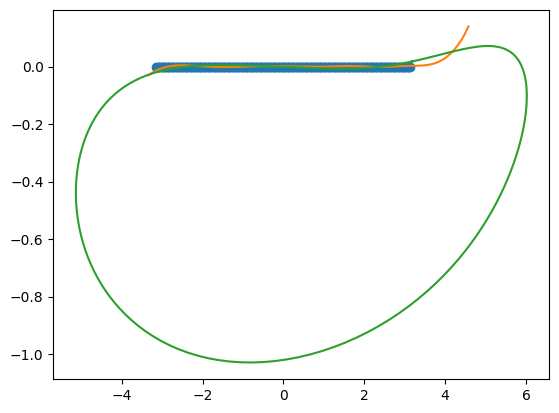

In [12]:
fig, axs = plt.subplots()
axs.scatter(line_points[:, 0], line_points[:, 1], color="C0")
axs.plot(line_test_embedding_line[:, 0], line_test_embedding_line[:, 1], color="C1")
axs.plot(ring_test_embedding_line[:, 0], ring_test_embedding_line[:, 1], color="C2")


In [13]:
ring_phases = np.linspace(start=-np.pi, stop=np.pi, num=200)
ring_points = np.stack([np.sin(ring_phases), np.cos(ring_phases)], axis=-1)

In [28]:
line_encoder_ring, line_decoder_ring, line_costs_ring = decode_1d.train(ring_points, 0, 1, device, n_training_iterations=1500,
                                                          verbose=True, integration_resamples=30)
print(line_costs_ring)


iteration: 0, decoding loss: 0.5108055472373962, distance cost: 3.512549665174447e-05, order reduction: 0.031273260712623596
iteration: 67, decoding loss: 0.40083199739456177, distance cost: 0.035929299890995026, order reduction: 0.015080761164426804
iteration: 84, decoding loss: 0.35785990953445435, distance cost: 0.07771904021501541, order reduction: 0.001532503287307918
iteration: 85, decoding loss: 0.352804571390152, distance cost: 0.07893116772174835, order reduction: 0.0008788392879068851
iteration: 87, decoding loss: 0.35086777806282043, distance cost: 0.07074601948261261, order reduction: 0.0030393062625080347
iteration: 89, decoding loss: 0.34334492683410645, distance cost: 0.01062105130404234, order reduction: 0.007074600551277399
iteration: 99, decoding loss: 0.3365306854248047, distance cost: 0.01678432710468769, order reduction: 0.0008195539121516049
iteration: 105, decoding loss: 0.33884701132774353, distance cost: 0.014208636246621609, order reduction: 0.0005934512591920

In [29]:
ring_encoder_ring, ring_decoder_ring, ring_costs_ring = decode_1d.train(ring_points, 1, 0, device, n_training_iterations=1500,
                                                          verbose=True, integration_resamples=30)
print(ring_costs_ring)


iteration: 0, decoding loss: 0.5277644991874695, distance cost: 0.010487181134521961, order reduction: 0.003600087948143482
iteration: 6, decoding loss: 0.26098141074180603, distance cost: 0.01961587928235531, order reduction: -4.199848262942396e-06
iteration: 22, decoding loss: 0.2638218104839325, distance cost: 0.005376236978918314, order reduction: 3.369073601788841e-05
iteration: 43, decoding loss: 0.24236665666103363, distance cost: 0.011994539760053158, order reduction: 0.0002467765298206359
iteration: 45, decoding loss: 0.23957867920398712, distance cost: 0.010737773962318897, order reduction: 0.0005738900508731604
iteration: 47, decoding loss: 0.18306714296340942, distance cost: 0.03930635750293732, order reduction: 0.000607424124609679
iteration: 48, decoding loss: 0.1264638751745224, distance cost: 0.03678319603204727, order reduction: 0.001609903178177774
iteration: 49, decoding loss: 0.06971658766269684, distance cost: 0.07454345375299454, order reduction: 0.002143334364518

In [30]:
with torch.no_grad():
    line_test_embedding_ring = line_encoder_ring(torch.tensor(np.expand_dims(line_phases, -1), dtype=torch.get_default_dtype()).to(device))
    ring_test_embedding_ring = ring_encoder_ring(torch.tensor(np.expand_dims(line_phases, -1), dtype=torch.get_default_dtype()).to(device))

line_test_embedding_ring = line_test_embedding_ring.cpu().numpy()
ring_test_embedding_ring = ring_test_embedding_ring.cpu().numpy()

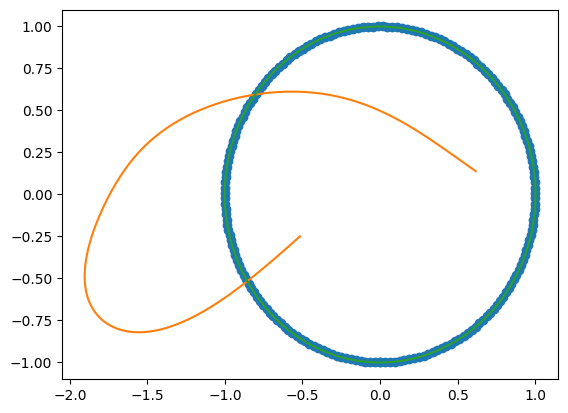

In [31]:
fig, axs = plt.subplots()
axs.scatter(ring_points[:, 0], ring_points[:, 1], color="C0")
axs.plot(line_test_embedding_ring[:, 0], line_test_embedding_ring[:, 1], color="C1")
axs.plot(ring_test_embedding_ring[:, 0], ring_test_embedding_ring[:, 1], color="C2")
